In [54]:
#necessary libraries for our project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols

In [9]:
#dataset loading, exploration, summary statistics, cleaning and variable type
data = '/Users/jackb/Desktop/Wellbeing_and_lifestyle_data_Kaggle.csv'
wlb = pd.read_csv(data)
wlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [10]:
wlb.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


In [11]:
wlb.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [12]:
wlb.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


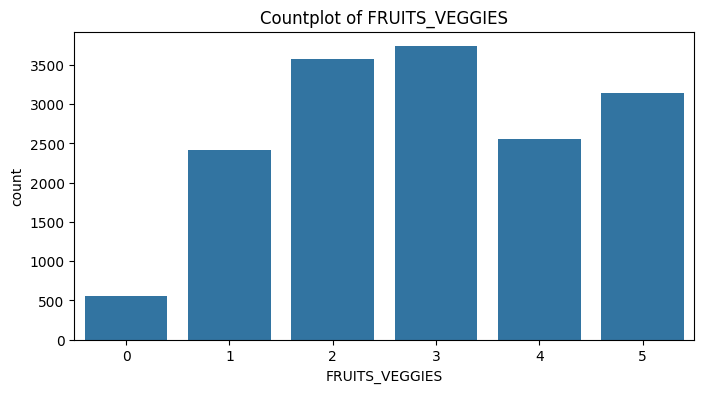

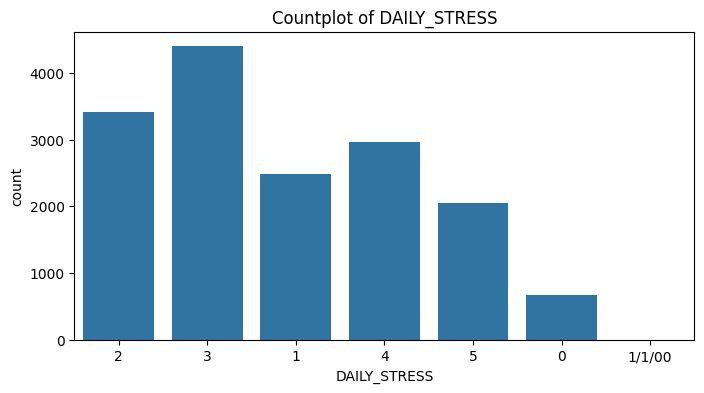

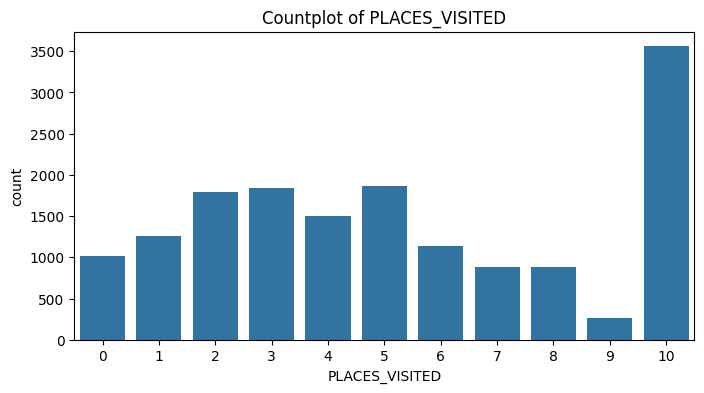

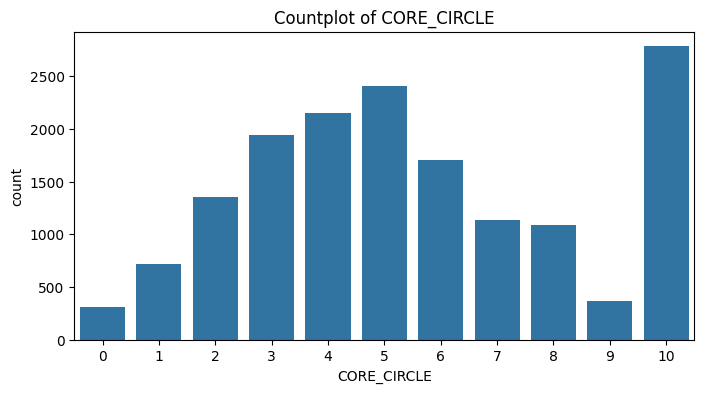

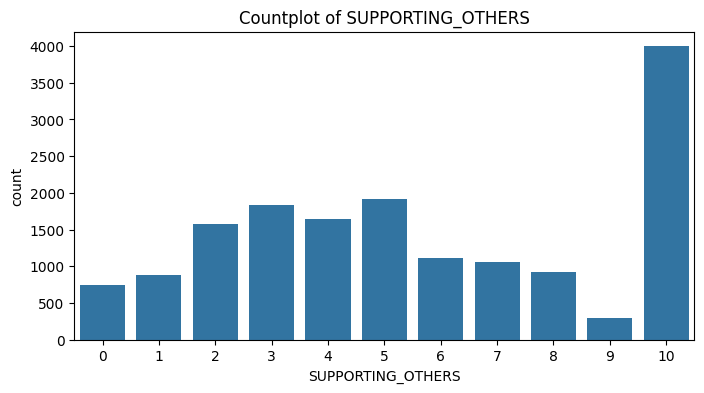

Outliers detection using box plots for each variable:



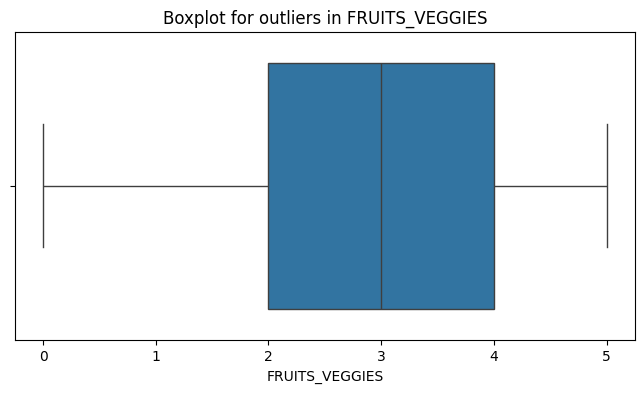

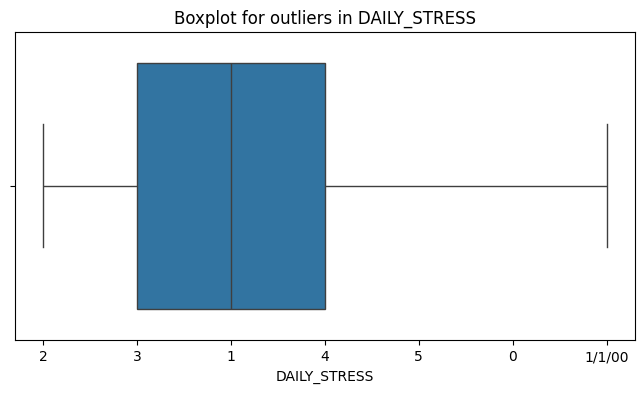

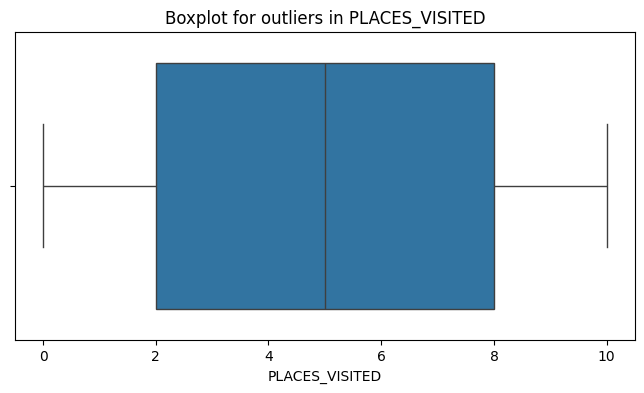

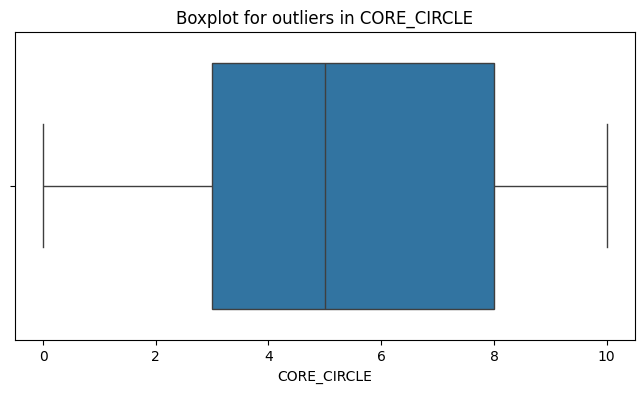

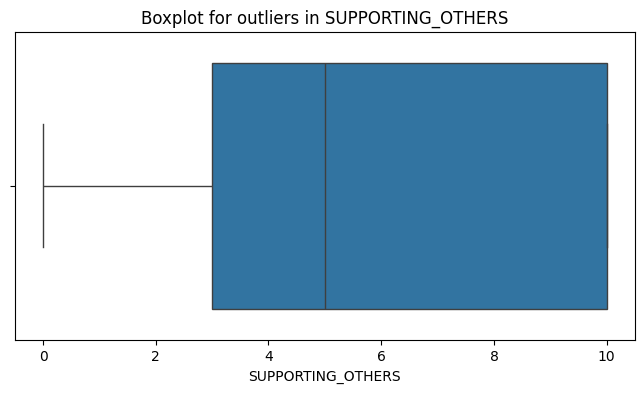

In [63]:
#variable exploration and outliers 
#removed some vars for file simplicity, will add back in for final copy 
variables = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 
             'SUPPORTING_OTHERS']
def is_discrete(series):
    unique_values = series.nunique()
    return unique_values < 15  # Arbitrary threshold to decide if it's discrete
for var in variables:
    plt.figure(figsize=(8, 4))
    if is_discrete(wlb[var]):
        sns.countplot(x=wlb[var])  # Discrete data: use count plot
        plt.title(f'Countplot of {var}')
    else:
        sns.histplot(wlb[var], kde=False)  # Continuous data: use histogram
        plt.title(f'Histogram of {var}')
    plt.show()
print("Outliers detection using box plots for each variable:\n")
for var in variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=wlb[var])
    plt.title(f'Boxplot for outliers in {var}')
    plt.show()


In [30]:
#create training target for random forest 
influential_vars = wlb.drop(columns=['Timestamp', 'WORK_LIFE_BALANCE_SCORE'])
target_var = wlb['WORK_LIFE_BALANCE_SCORE']

In [24]:
#create training and test sets (method sampling here- reference chapter in presentation)
#include where threshold was set (1/3 test) and why in presentation
#include random state number selection at 42 in presentation
xtrain, xtest, ytrain, ytest = train_test_split(influential_vars, target_var, test_size = 0.3, random_state = 42)

In [26]:
#check all training and test data for non compliant data types with the random forest regressor
print(xtrain.dtypes)

FRUITS_VEGGIES        int64
DAILY_STRESS         object
PLACES_VISITED        int64
CORE_CIRCLE           int64
SUPPORTING_OTHERS     int64
SOCIAL_NETWORK        int64
ACHIEVEMENT           int64
DONATION              int64
BMI_RANGE             int64
TODO_COMPLETED        int64
FLOW                  int64
DAILY_STEPS           int64
LIVE_VISION           int64
SLEEP_HOURS           int64
LOST_VACATION         int64
DAILY_SHOUTING        int64
SUFFICIENT_INCOME     int64
PERSONAL_AWARDS       int64
TIME_FOR_PASSION      int64
WEEKLY_MEDITATION     int64
AGE                  object
GENDER               object
dtype: object


In [42]:
#drop all non numeric types, cannot be processed by the RF 
xtrain_numeric = xtrain.drop(columns=['DAILY_STRESS','AGE','GENDER'])
xtest_numeric = xtest.drop(columns=['DAILY_STRESS','AGE','GENDER'])
ytrain_numeric = ytrain.drop(columns=['DAILY_STRESS','AGE','GENDER'])
ytest_numeric = ytest.drop(columns=['DAILY_STRESS','AGE','GENDER'])
cols = xtrain_numeric.columns

In [32]:
#create the master random forest regression analysis with all variables
#include why estimators at 100 in presentation
forest_of_trees = RandomForestRegressor(n_estimators=100, random_state=42)
#train the model on your training sets for both influence and target 
forest_of_trees.fit(xtrain_numeric,ytrain_numeric)

RandomForestRegressor(random_state=42)

In [33]:
#predict using test set
predictions = forest_of_trees.predict(xtest_numeric)

In [34]:
#take a look at the prediction accuracy
mean_error_val = mean_squared_error(ytest_numeric,predictions)
r2score = r2_score(ytest_numeric, predictions)
print(mean_error_val, r2score)

133.55138038626882 0.9334609714575094


In [43]:
#take a look at variables of high importance now, test multiple values here to find the ultimate k value 
importance = forest_of_trees.feature_importances_
importanceframe = pd.DataFrame({'Feature': cols, 'Importance': importance})
importanceframe = importanceframe.sort_values(by='Importance', ascending=False)
print(importanceframe)

              Feature  Importance
3   SUPPORTING_OTHERS    0.171913
8      TODO_COMPLETED    0.161157
1      PLACES_VISITED    0.116262
5         ACHIEVEMENT    0.099030
15  SUFFICIENT_INCOME    0.062847
18  WEEKLY_MEDITATION    0.046070
17   TIME_FOR_PASSION    0.044167
11        LIVE_VISION    0.036629
2         CORE_CIRCLE    0.035220
16    PERSONAL_AWARDS    0.033404
10        DAILY_STEPS    0.032673
7           BMI_RANGE    0.027799
0      FRUITS_VEGGIES    0.023925
6            DONATION    0.022905
13      LOST_VACATION    0.022224
14     DAILY_SHOUTING    0.020149
9                FLOW    0.018691
4      SOCIAL_NETWORK    0.017619
12        SLEEP_HOURS    0.007315


Correlation Matrix:



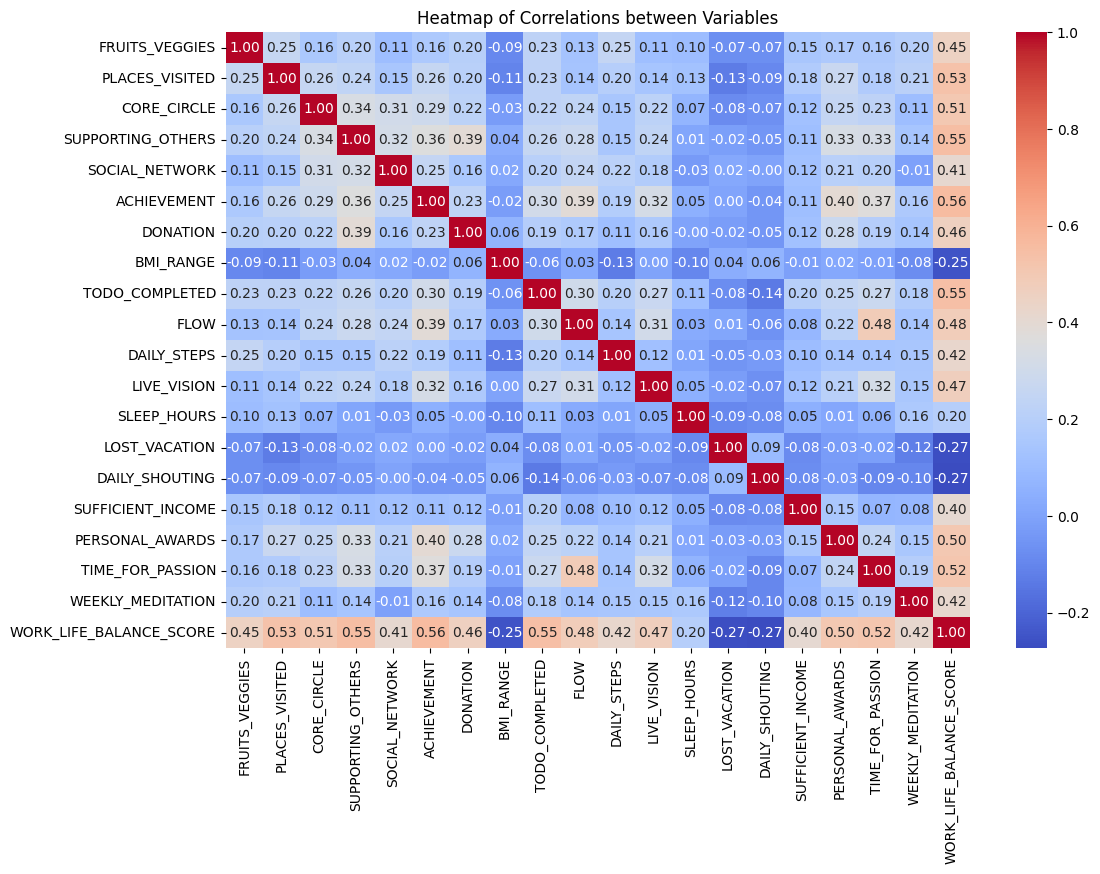

In [46]:
#run many more Random forests of different sizes, see which size works the best for K and make a final model for optimal results
#utilize a log reg heat map to decide which variables to use logreg style 
print("Correlation Matrix:\n")
numeric_df = wlb[variables].select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Heatmap of Correlations between Variables")
plt.show()

In [60]:
#from the heat map above, with k identified, choose k variables of interest to create the ultimate Random Forest here: 
#for placement I am going to predict K is 3 but I will do further analysis in the next few days to get the real value for k 
#these values will be MUCH WORSE FOR THE TIME BEING - WILL UPDATE SOON 
influential_final = wlb[['ACHIEVEMENT','SUPPORTING_OTHERS', 'TODO_COMPLETED']]
target_final = wlb['WORK_LIFE_BALANCE_SCORE']
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(influential_final, target_final, test_size = 0.3, random_state = 42)
cols = xtrain2.columns
forest_of_trees2 = RandomForestRegressor(n_estimators=100, random_state=42)
#train the model on your training sets for both influence and target 
forest_of_trees2.fit(xtrain2,ytrain2)
predictions2 = forest_of_trees2.predict(xtest2)
mean_error_val2 = mean_squared_error(ytest2,predictions2)
r2score2 = r2_score(ytest2, predictions2)
print(mean_error_val2, r2score2)

962.1344474272154 0.5206377405167195


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       0.315
Model:                                 OLS   Adj. R-squared:                  0.315
Method:                      Least Squares   F-statistic:                     7344.
Date:                     Mon, 07 Oct 2024   Prob (F-statistic):               0.00
Time:                             15:58:22   Log-Likelihood:                -80449.
No. Observations:                    15972   AIC:                         1.609e+05
Df Residuals:                        15970   BIC:                         1.609e+05
Df Model:                                1                                    

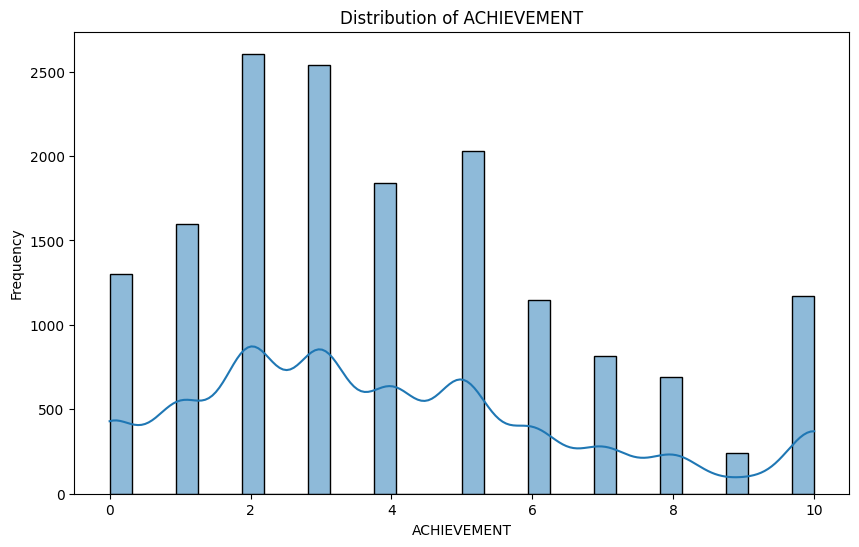

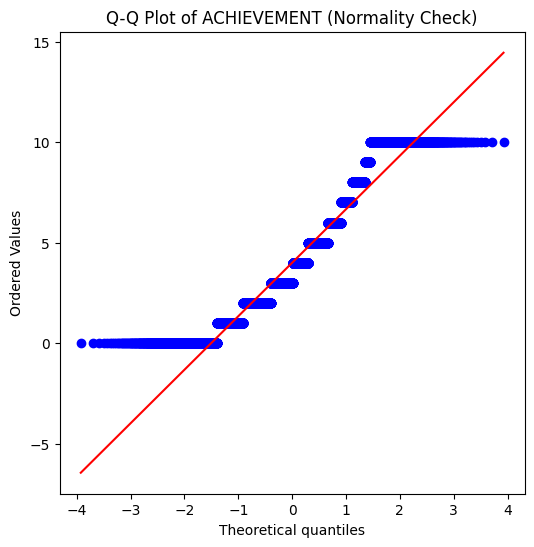

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


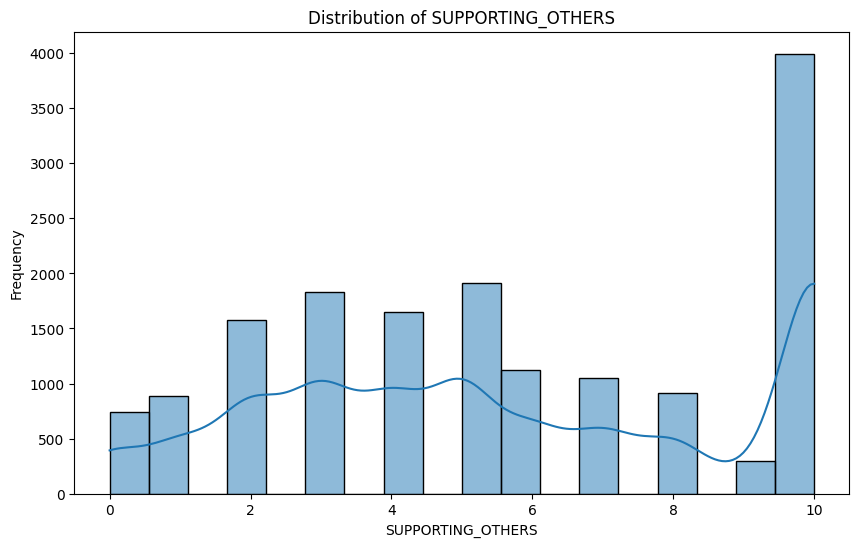

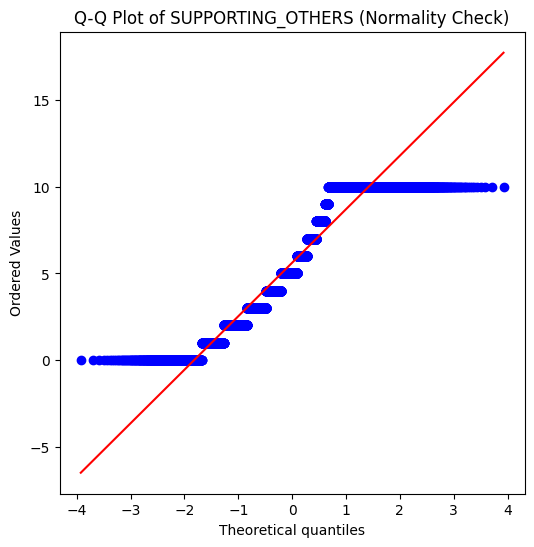

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


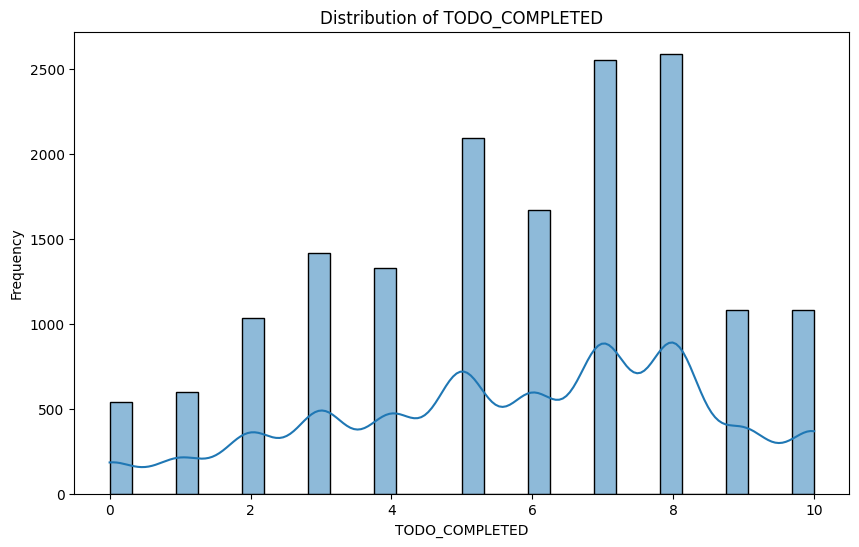

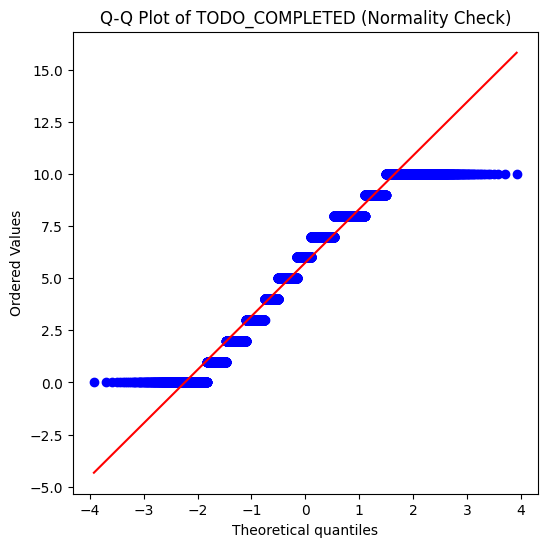

In [61]:
#Variables of high interest are Achievement, Todo Completed and Supporting Others 
#construct hypothesis testing 
# null hypothesis = no significant influence on WLB 
#show all distributions and relecant information from chapters 2 and 3
#elaborate and explain what these values mean in presentation 
variables = ['ACHIEVEMENT', 'SUPPORTING_OTHERS', 'TODO_COMPLETED']
target = 'WORK_LIFE_BALANCE_SCORE'
p_values = {}
for var in variables:
    model = ols(f'{target} ~ {var}', data=wlb).fit()
    print(model.summary())
    p_value = model.pvalues[var]
    p_values[var] = p_value
    alpha = 0.05
    if p_value < alpha:
        print(f"{var} has a significant influence on the Work-Life Balance score (p-value = {p_value:.4f})")
    else:
        print(f"{var} does NOT have a significant influence on the Work-Life Balance score (p-value = {p_value:.4f})")
print("P-values for each variable: ", p_values)
for var in variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(wlb[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.figure(figsize=(6, 6))
    stats.probplot(wlb[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var} (Normality Check)')
    plt.show()